# <h1 style="background-color:white;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Loan Classification</h1>

# ![loan](images.jpg)

# Meta Data

Data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back.

I will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower meet the criteria or not.

## Features:

1-credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

2-purpose: The purpose of the loan (values: "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

3-int.rate: The interest rate of the loan, as a proportion.

4-installment: The monthly installments owed by the borrower if the loan is funded.

5-log.annual.inc: The natural log of the self-reported annual income of the borrower.

6-dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

7-fico: The FICO credit score of the borrower.

8-days.with.cr.line: The number of days the borrower has had a credit line.

9-revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

10-revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

11-inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

12-delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

13-pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# import the important libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
import sklearn

In [2]:
import warnings
warnings.simplefilter(action= "ignore",category=FutureWarning)

In [3]:
df=pd.read_csv(r"C:\Users\hp\Downloads\DATA SCIENCE\loan/loan_data.csv")

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [6]:
# data shpae
df.shape

(9578, 14)

In [7]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [8]:
df['credit.policy'].value_counts()

credit.policy
1    7710
0    1868
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [10]:
# Generating a statistical summary of the dataset
statistical_summary = df.describe()
statistical_summary

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [11]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [12]:
# number of values in column
df['purpose'].nunique()

7

In [13]:
#  number of each values in column
df['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

# <h1 style="background-color:white;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Data visualization and Analysis</h1>

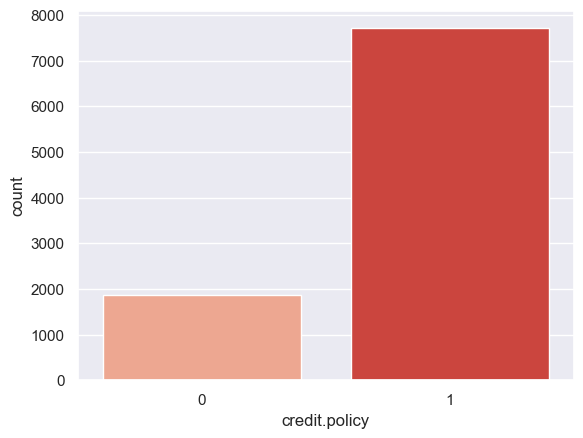

In [14]:
#check credit.policy
sns.countplot(x="credit.policy",data=df, palette="Reds")
plt.show()

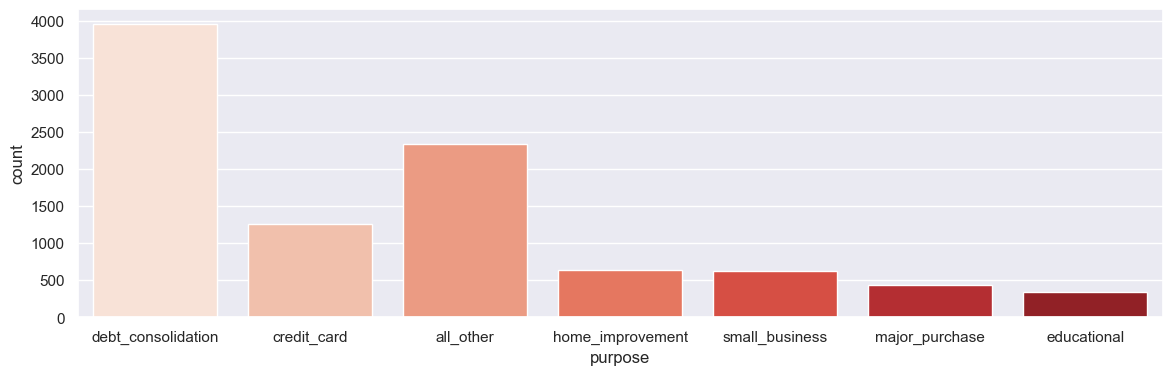

In [15]:
#check number of each values in  purpose column on graph
plt.figure(figsize=(14,4))
sns.countplot(x="purpose",data=df, palette="Reds")
plt.show()

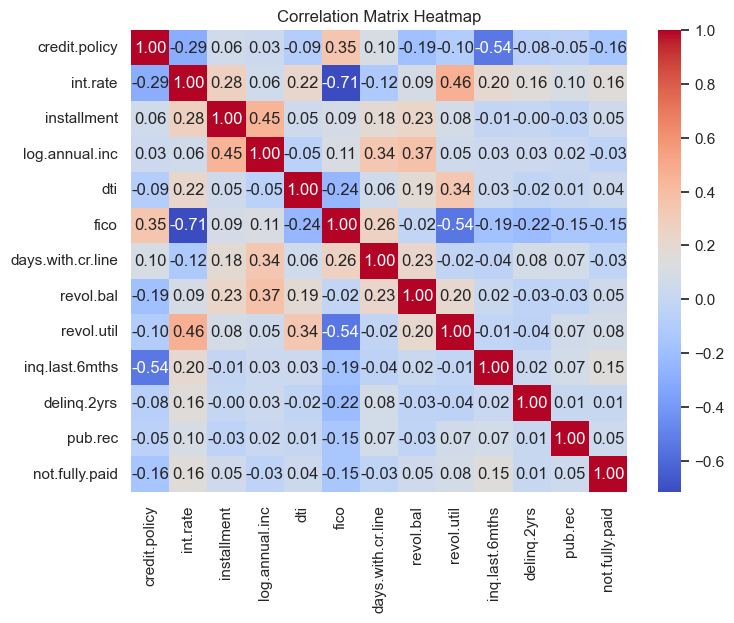

In [16]:
# This code selects columns of type float64 and then converts the resulting Index object to a list.
df_num = df.select_dtypes(include=['float64', 'int64']).columns.tolist() 
correlation_matrix  = df[df_num].corr()
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [17]:
# trying to find relation between income range and loan purpose

avg_inc_loan_purpose = df.groupby('purpose').agg({'log.annual.inc':['mean','max','min']})
avg_inc_loan_purpose

log.annual.inc                     
                             mean        max       min
purpose                                               
all_other               10.845313  13.997832  7.600902
credit_card             11.047230  13.142166  8.922658
debt_consolidation      10.912909  14.528354  7.547502
educational             10.549956  12.206073  8.101678
home_improvement        11.201979  13.487006  9.392662
major_purchase          10.844895  14.180154  8.699515
small_business          11.146216  13.331002  8.987197

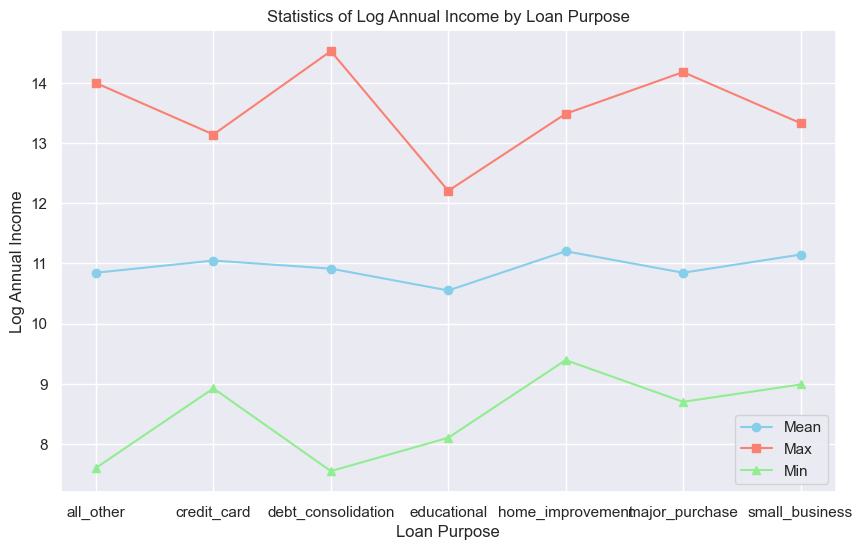

In [18]:
# Plotting mean, max, and min log annual income for each loan purpose
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting mean as a line
avg_inc_loan_purpose['log.annual.inc']['mean'].plot(kind='line', marker='o', color='skyblue', ax=ax, label='Mean')
# Plotting max as a line
avg_inc_loan_purpose['log.annual.inc']['max'].plot(kind='line', marker='s', color='salmon', ax=ax, label='Max')
# Plotting min as a line
avg_inc_loan_purpose['log.annual.inc']['min'].plot(kind='line', marker='^', color='lightgreen', ax=ax, label='Min')

# Adding labels and title
plt.xlabel('Loan Purpose')
plt.ylabel('Log Annual Income')
plt.title('Statistics of Log Annual Income by Loan Purpose')
plt.legend()

plt.show()

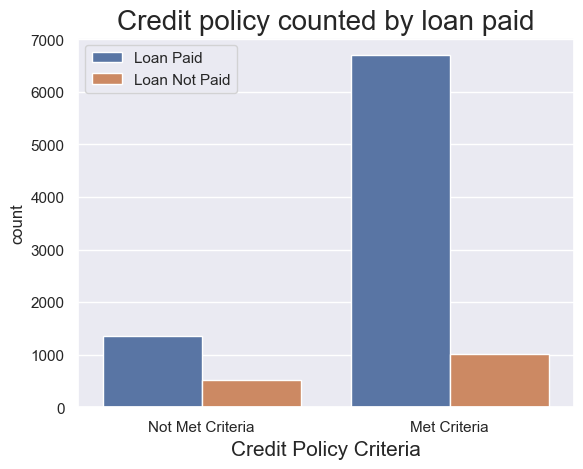

In [19]:
sns.countplot(data=df, x='credit.policy', hue='not.fully.paid')
plt.xlabel('Credit Policy Criteria', size=15)
plt.xticks(ticks=[1,0],labels=['Met Criteria','Not Met Criteria'])
plt.legend(['Loan Paid','Loan Not Paid'])
plt.title('Credit policy counted by loan paid', size=20);

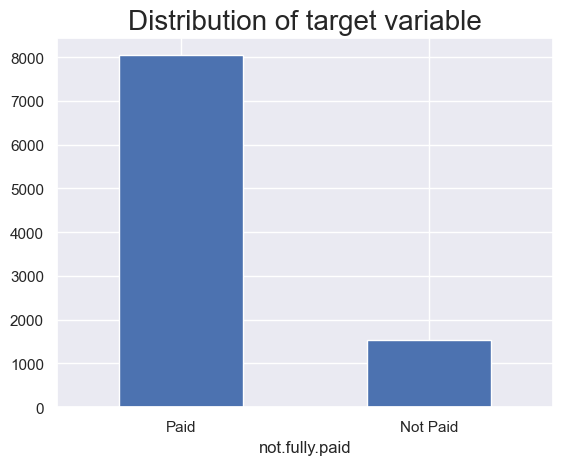

In [20]:
df['not.fully.paid'].value_counts().plot(kind='bar')
plt.title('Distribution of target variable', size=20)
plt.xticks(ticks=[0,1],labels=['Paid', 'Not Paid'],rotation=360);

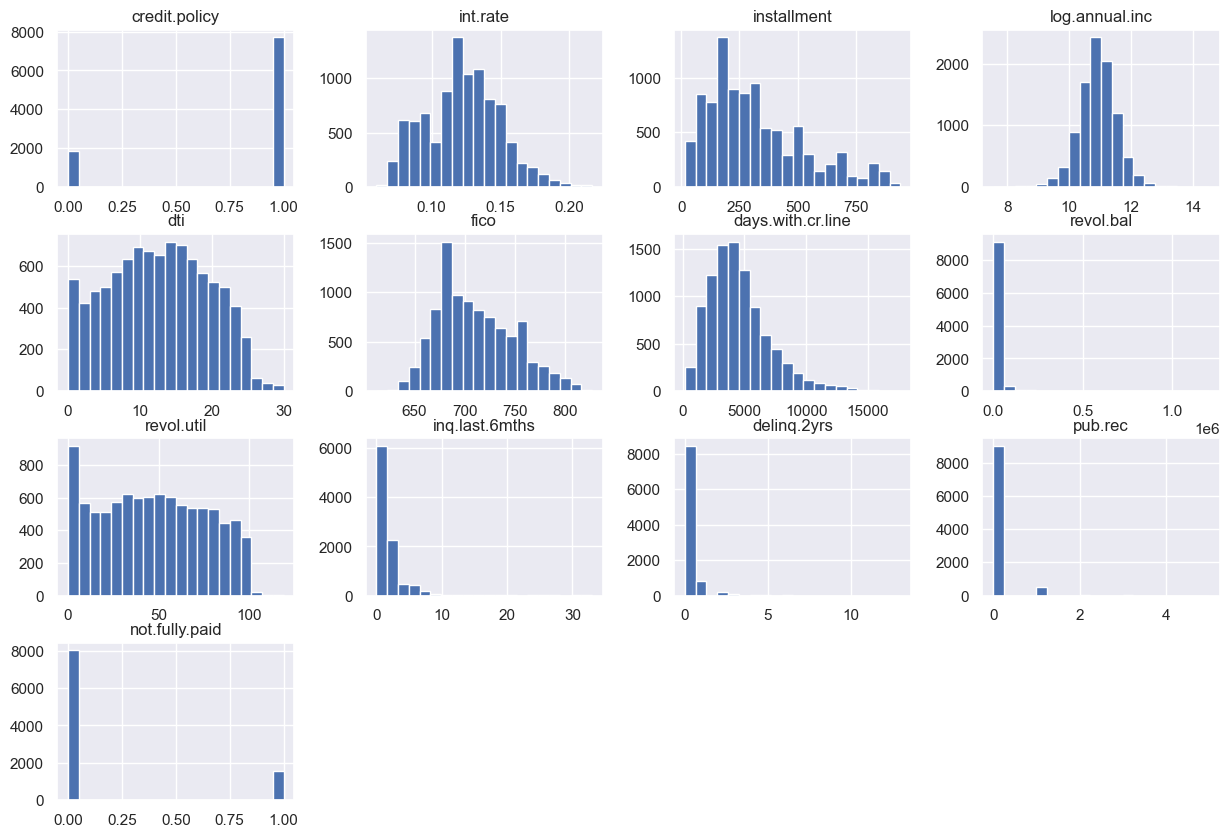

In [21]:
numeric_data =df.select_dtypes(include=['int64', 'float64'])
numeric_data.hist(bins=20, figsize=(15, 10))
plt.show()

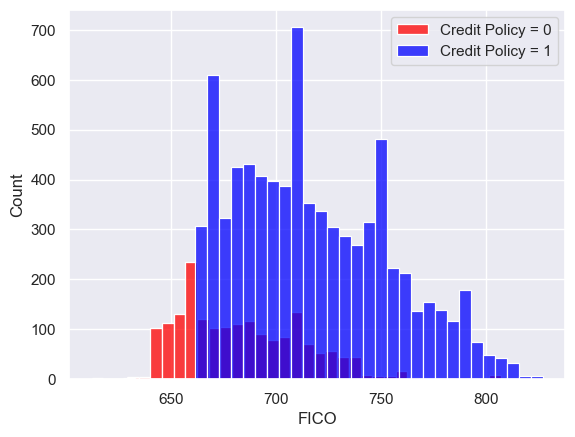

In [22]:
#for Credit Policy = 0
sns.histplot(df[df['credit.policy'] == 0]['fico'], bins=35, kde=False, color='red', label='Credit Policy = 0')

# For Credit Policy = 1
sns.histplot(df[df['credit.policy'] == 1]['fico'], bins=35, kde=False, color='blue', label='Credit Policy = 1')

# Add labels and legend
plt.xlabel('FICO')
plt.ylabel('Count')
plt.legend()

# Show plot
plt.show()

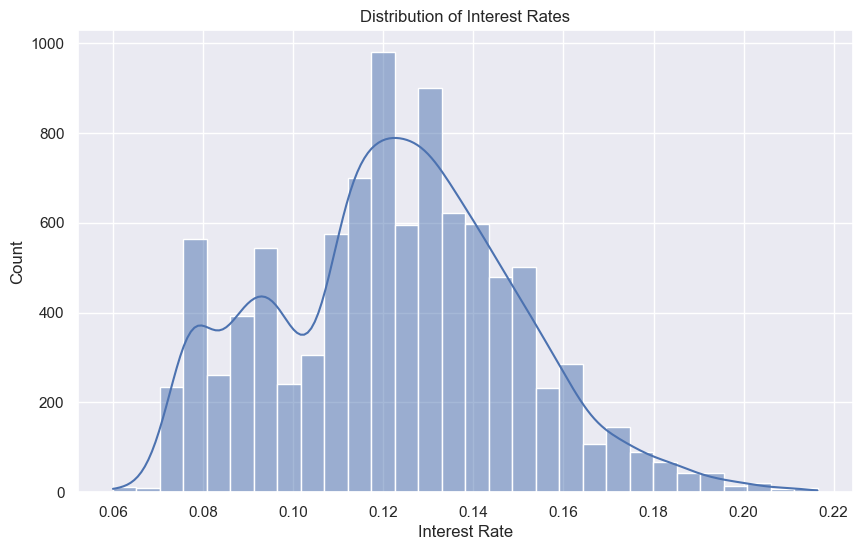

In [23]:
# Explore the distribution of interest rates
plt.figure(figsize=(10, 6))
sns.histplot(df['int.rate'], bins=30, kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate')
plt.show()

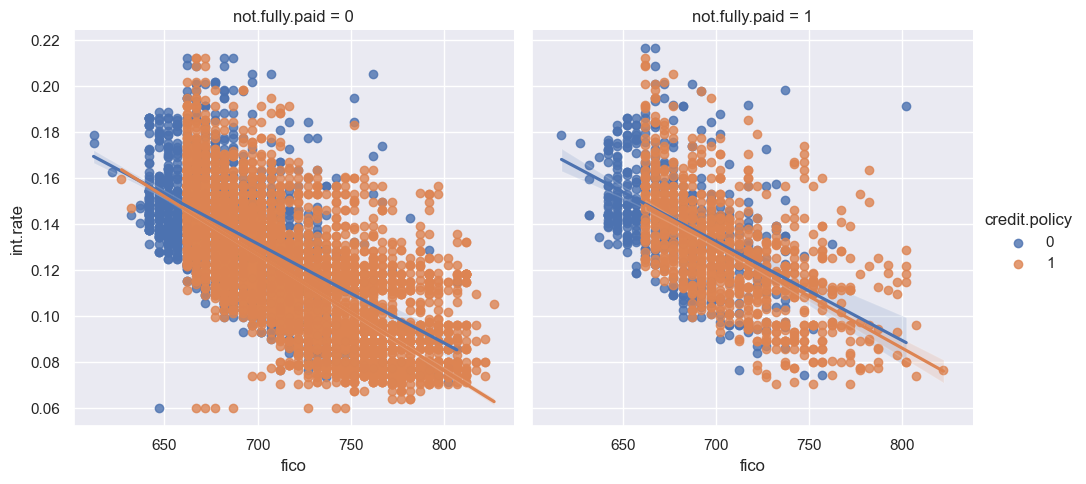

In [24]:
sns.lmplot(x = 'fico', y = 'int.rate', col = 'not.fully.paid', hue = 'credit.policy', data = df)

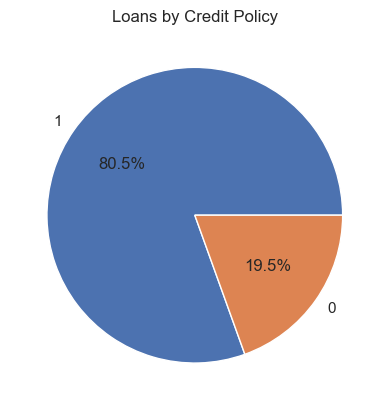

In [25]:
df['credit.policy'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Loans by Credit Policy')
plt.ylabel('')
plt.show()

# <h1 style="background-color:white;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Preprocessing </h1>

## **LABEL ENCODING**


In [26]:
# import labelencoder from sklearn
from sklearn.preprocessing import LabelEncoder

In [27]:
# Initialize LabelEncoder
label_en= LabelEncoder()

In [28]:
# fit and transfoam the labelencoding
df['purpose']= label_en.fit_transform(df['purpose']) # encode purpose column

In [29]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


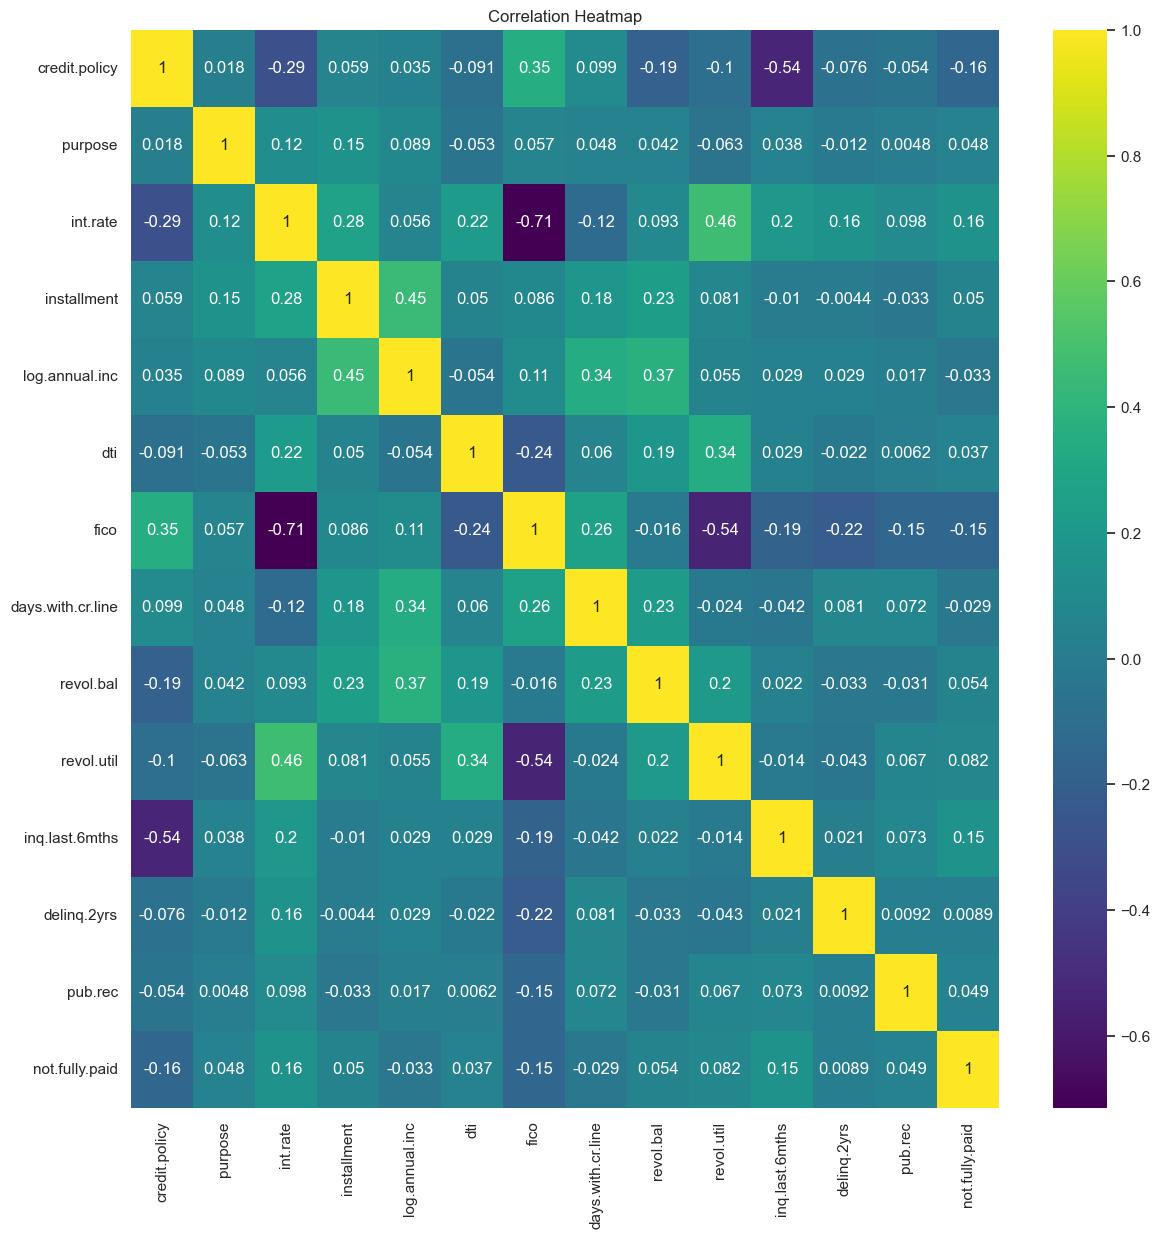

In [30]:
corr = df.corr()

plt.figure(figsize=(14, 14))  
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

## cleaning data from -ve values

In [31]:
num_negative_values = (df['int.rate'] < 0).sum()
num_negative_values

0

# **checking duplicate rows in dataset**

In [32]:
# Count the number of duplicate rows
duplicates = df.duplicated().sum()

# Print the number of duplicate values
print("Number of duplicate values:",duplicates)

Number of duplicate values: 0


### purpose count 

In [33]:
df["purpose"].value_counts()

purpose
2    3957
0    2331
1    1262
4     629
6     619
5     437
3     343
Name: count, dtype: int64

In [34]:
df['credit.policy'].value_counts()

credit.policy
1    7710
0    1868
Name: count, dtype: int64

### **data is  highly imbalance**
 1 = credit
 
0 = not_credit

In [35]:
# seprating majority  and minority class
majority=df[df['credit.policy']==1]
minority=df[df['credit.policy']==0]


# **undersampling**

In [36]:
majority_sample=majority.sample(n=1868)

In [37]:
# concatinate two(2) dataset
new_df=pd.concat([majority_sample,minority],axis=0)

In [38]:
new_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1674,1,6,0.1525,869.70,11.918391,6.82,682,4980.041667,0,0.0,0,0,0,0
3003,1,4,0.1189,464.30,11.589887,11.34,732,3719.958333,47016,37.1,0,0,0,0
6124,1,4,0.0894,254.18,11.461632,8.82,742,5730.000000,21275,50.2,0,0,0,0
3485,1,2,0.1189,159.19,11.002100,15.32,697,4949.958333,52275,33.7,0,0,0,0
4307,1,2,0.1600,351.58,11.110166,10.30,662,3059.958333,15735,87.8,1,1,0,0


In [39]:
new_df.shape

(3736, 14)

In [40]:
new_df['credit.policy'].value_counts()

credit.policy
1    1868
0    1868
Name: count, dtype: int64

# <h1 style="background-color:white;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Models training and evaluation  </h1>

## **Target Variable Splitting and standardization**

In [41]:
# Split data to be used in the models
# Create matrix of features
x = new_df.drop('credit.policy', axis = 1) # grabs everything else but 'credit.policy'

# Create target variable
y = new_df['credit.policy'] # y is the column we're trying to predict

In [42]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [43]:
y.shape

(3736,)

In [44]:
x.shape

(3736, 13)

In [45]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size = .20, random_state = 101)

# **1. LOGISTIC REGRESSION**

In [46]:
# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)

Logistic Regression


LogisticRegression()

## **Model Evaluation**
**Logistic regression**

In [47]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)
# Score It

print('Logistic Regression')
# Accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 84.63 %


Precision: 0.85
Recall: 0.82
------------------------------------------------------------
[[335  51]
 [ 64 298]]


<Axes: >

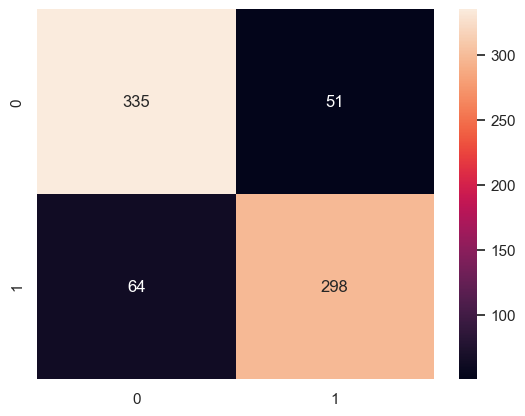

In [48]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_log_reg)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")

## **2. Decision Tree**

## **Model Training**

In [49]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(x_train, y_train)

Decision Tree Classifier


DecisionTreeClassifier()

## **Model Evalution**
**Decision Tree Classifier**

In [50]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_Dtree = Dtree.predict(x_test)
# Score It

print('Decision Tree Classifier')
# Accuracy
print('--'*30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)
print('Accuracy', Dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 97.59 %


Precision: 0.98
Recall: 0.97
------------------------------------------------------------


<Axes: >

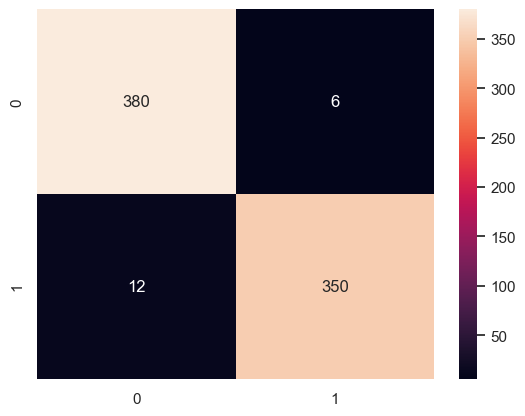

In [51]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_Dtree)
recall = recall_score(y_test, y_pred_Dtree)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_Dtree)

sns.heatmap(confusion, annot=True, fmt="d")

# **3. Random Forest**

## **Model Training**

In [52]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)

Random Forest Classifier


RandomForestClassifier()

## **Model Evaluation**
**Random Forest**

In [53]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rfc.predict(x_test)
# Score It

print('Random Forest Classifier')
# Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 96.93 %


Precision: 0.97
Recall: 0.97
------------------------------------------------------------


<Axes: >

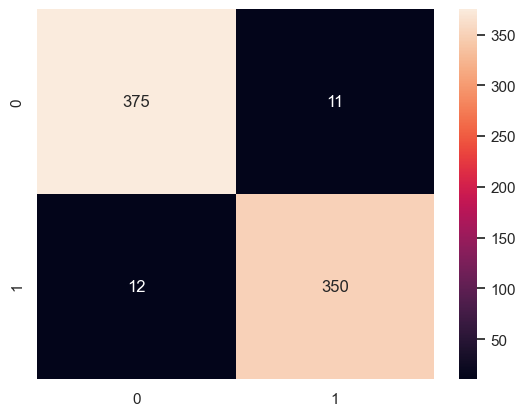

In [54]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(confusion, annot=True, fmt="d")

# **4. K-Nearst Neighbor Classifier**

## **Model Training**

In [55]:
from sklearn.neighbors import KNeighborsClassifier
# Create instance of model
knn = KNeighborsClassifier()

# Pass training data into model
knn.fit(x_train, y_train)


KNeighborsClassifier()

## **Model Evalution**
**KNN**

In [56]:
from sklearn.metrics import accuracy_score
# Prediction from the model
y_pred_knn = knn.predict(x_test)

# Score It
print('K-Nearest Neighbors (KNN)')
print('--' * 30)

# Accuracy
knn_accuracy = round(accuracy_score(y_test, y_pred_knn) * 100, 2)
print('Accuracy:', knn_accuracy, '%')

K-Nearest Neighbors (KNN)
------------------------------------------------------------
Accuracy: 83.29 %


Precision: 0.80
Recall: 0.87
------------------------------------------------------------


<Axes: >

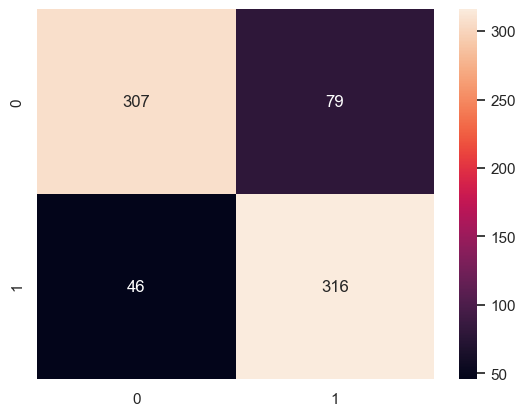

In [57]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(confusion, annot=True, fmt="d")

 
# **5. Support Vector Machine**

# **Model Training**

In [58]:
from sklearn.svm import SVC
# Create instance of model
svm = SVC()

# Pass training data into model
svm.fit(x_train, y_train)


SVC()

# **Model Evaluation**
**SVM**

In [59]:
# Prediction from the model
y_pred_svm = svm.predict(x_test)

# Score It
print('Support Vector Machine (SVM)')
print('--' * 30)

# Accuracy
svm_accuracy = round(accuracy_score(y_test, y_pred_svm) * 100, 2)
print('Accuracy:', svm_accuracy, '%')

Support Vector Machine (SVM)
------------------------------------------------------------
Accuracy: 88.5 %


Precision: 0.90
Recall: 0.86
------------------------------------------------------------


<Axes: >

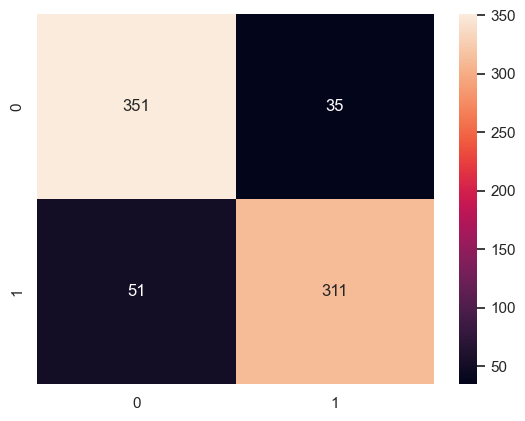

In [60]:
# Calculate precision and recall
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(confusion, annot=True, fmt="d")

# 6.Gradient Bossting Classifier

## Model Training

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

print('Gradient Boosting Classifier')
# Create instance of model
gbc = GradientBoostingClassifier()

# Pass training data into model
gbc.fit(x_train, y_train)

Gradient Boosting Classifier


GradientBoostingClassifier()

## Model Evalution

### Gradient Bossting 

In [62]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_gbc = gbc.predict(x_test)
# Score It

print('Gradient Boosting Classifier')
# Accuracy
print('--'*30)
gbc_accuracy = round(accuracy_score(y_test, y_pred_gbc) * 100,2)
print('Accuracy', gbc_accuracy,'%')

Gradient Boosting Classifier
------------------------------------------------------------
Accuracy 98.26 %


Precision: 0.97
Recall: 0.99
------------------------------------------------------------


<Axes: >

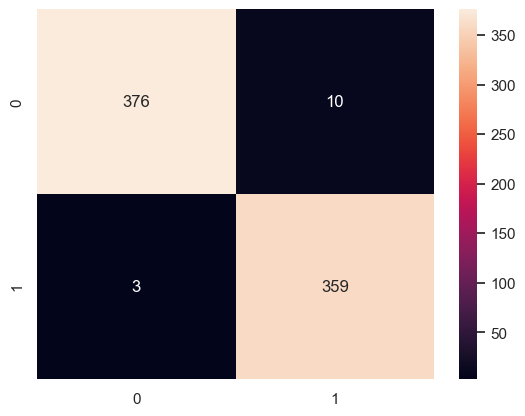

In [63]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_gbc)
recall = recall_score(y_test, y_pred_gbc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(confusion, annot=True, fmt="d")

# comparison between models

In [64]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Logistic Regression": log_reg_accuracy,
    "Decision Tree Classifier": Dtree_accuracy,
    "Random Forest Classifier": rfc_accuracy,
    "Support Vector Machine":svm_accuracy,
    "K-Neart Neighbor":knn_accuracy,
    "Gradient Boosting Classifier":gbc_accuracy,
    
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (Greater Values are better):
1. Gradient Boosting Classifier: 98.26
2. Decision Tree Classifier: 97.59
3. Random Forest Classifier: 96.93
4. Support Vector Machine: 88.5
5. Logistic Regression: 84.63
6. K-Neart Neighbor: 83.29


# <h1 style="background-color:white;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Thank You</h1>
